In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
import pylab as plt

# 10 class, categories at Q3

# Loading csv files for training
print("reading csv file")
csv = pd.read_csv('data_formatted_classified_simple_10_Q3.csv', index_col=0)

pd_train_data = csv.iloc[810000:891000]
pd_test_data = csv.iloc[891000:900000]
benchmark_data = csv.iloc[900001:]

print(pd_train_data.head())
print(pd_test_data.head())

pd_train_data_target = pd_train_data.pop("future_hits") 
pd_test_data_target = pd_test_data.pop("future_hits") 

pd_train_data = pd_train_data.to_numpy()
pd_test_data = pd_test_data.to_numpy()

print(np.shape(pd_test_data))

def plot_history(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

reading csv file
          id  key_search  future_hits
810000   570           0            0
810001  2165           0            0
810002   570           0            0
810003   102           0            0
810004  1932           0            0
          id  key_search  future_hits
891000  3803           0            0
891001  1403           0            1
891002  2970           0            0
891003  2462           0            0
891004  2246           0            0
(9000, 2)


Epoch 1/10
810/810 [==============================] - 2s 2ms/step - loss: 0.5836 - accuracy: 0.7442 - val_loss: 0.5606 - val_accuracy: 0.7524
Epoch 2/10
810/810 [==============================] - 1s 2ms/step - loss: 0.5697 - accuracy: 0.7498 - val_loss: 0.5601 - val_accuracy: 0.7524
Epoch 3/10
810/810 [==============================] - 1s 2ms/step - loss: 0.5657 - accuracy: 0.7498 - val_loss: 0.5599 - val_accuracy: 0.7524
Epoch 4/10
810/810 [==============================] - 1s 2ms/step - loss: 0.5639 - accuracy: 0.7498 - val_loss: 0.5599 - val_accuracy: 0.7524
Epoch 5/10
810/810 [==============================] - 1s 2ms/step - loss: 0.5632 - accuracy: 0.7498 - val_loss: 0.5596 - val_accuracy: 0.7524
Epoch 6/10
810/810 [==============================] - 1s 2ms/step - loss: 0.5628 - accuracy: 0.7498 - val_loss: 0.5598 - val_accuracy: 0.7524
Epoch 7/10
810/810 [==============================] - 1s 2ms/step - loss: 0.5627 - accuracy: 0.7498 - val_loss: 0.5596 - val_accuracy: 0.7524
Epoch 

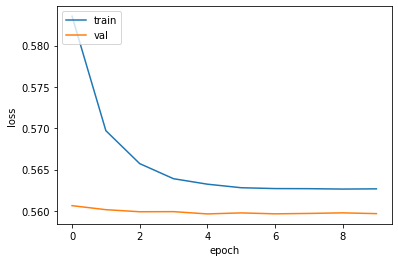

In [8]:
def setup_FCN_1():

    # Swquential Model is used.
    model = tf.keras.Sequential()

    # Consist of 4 Layers of nodes.
    # First layer consist of 2 nodes, to receive 2 inputs
    # Second layer consist of 12 nodes.
    # Third layer consist of  12 nodes.
    # Last Layer consist of 1 node, to output either 0 or 1
    # We are using binary_crossentropy as the loss function, hence the last layer is setup that way.

    model.add(tf.keras.layers.Dense(2, input_shape=(None, 2), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(4, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(4, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(4, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile the model using binary_crossentropy.
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    # return the model after compilation
    return model

# Create and setting up the model using setup_FCN()
model = setup_FCN_1()
model.save('models/small_Q3_FCN1.h5')

# Use model.fit to train it. As we have a very large dataset, we do not have to train it multiple times.
history = model.fit(pd_train_data, pd_train_data_target, validation_data=(pd_test_data, pd_test_data_target), epochs=10, batch_size=100)

plot_history(history)

Epoch 1/10
810/810 [==============================] - 2s 2ms/step - loss: 0.5872 - accuracy: 0.7329 - val_loss: 0.5604 - val_accuracy: 0.7524
Epoch 2/10
810/810 [==============================] - 1s 2ms/step - loss: 0.5699 - accuracy: 0.7498 - val_loss: 0.5600 - val_accuracy: 0.7524
Epoch 3/10
810/810 [==============================] - 1s 2ms/step - loss: 0.5667 - accuracy: 0.7498 - val_loss: 0.5598 - val_accuracy: 0.7524
Epoch 4/10
810/810 [==============================] - 1s 2ms/step - loss: 0.5646 - accuracy: 0.7498 - val_loss: 0.5598 - val_accuracy: 0.7524
Epoch 5/10
810/810 [==============================] - 1s 2ms/step - loss: 0.5636 - accuracy: 0.7498 - val_loss: 0.5600 - val_accuracy: 0.7524
Epoch 6/10
810/810 [==============================] - 1s 2ms/step - loss: 0.5631 - accuracy: 0.7498 - val_loss: 0.5599 - val_accuracy: 0.7524
Epoch 7/10
810/810 [==============================] - 1s 2ms/step - loss: 0.5629 - accuracy: 0.7498 - val_loss: 0.5597 - val_accuracy: 0.7524
Epoch 

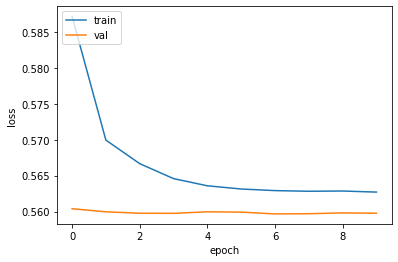

In [9]:
def setup_FCN_2():

    # Swquential Model is used.
    model = tf.keras.Sequential()

    # Consist of 4 Layers of nodes.
    # First layer consist of 2 nodes, to receive 2 inputs
    # Second layer consist of 12 nodes.
    # Third layer consist of  12 nodes.
    # Last Layer consist of 1 node, to output either 0 or 1
    # We are using binary_crossentropy as the loss function, hence the last layer is setup that way.

    model.add(tf.keras.layers.Dense(2, input_shape=(None, 2), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(8, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(8, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(8, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile the model using binary_crossentropy.
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    # return the model after compilation
    return model

# Create and setting up the model using setup_FCN()
model = setup_FCN_2()
model.save('models/small_Q3_FCN2.h5')

# Use model.fit to train it. As we have a very large dataset, we do not have to train it multiple times.
history = model.fit(pd_train_data, pd_train_data_target, validation_data=(pd_test_data, pd_test_data_target), epochs=10, batch_size=100)

plot_history(history)

Epoch 1/10
810/810 [==============================] - 2s 2ms/step - loss: 0.6049 - accuracy: 0.7224 - val_loss: 0.5596 - val_accuracy: 0.7524
Epoch 2/10
810/810 [==============================] - 1s 2ms/step - loss: 0.5708 - accuracy: 0.7496 - val_loss: 0.5598 - val_accuracy: 0.7524
Epoch 3/10
810/810 [==============================] - 1s 2ms/step - loss: 0.5660 - accuracy: 0.7498 - val_loss: 0.5600 - val_accuracy: 0.7524
Epoch 4/10
810/810 [==============================] - 2s 2ms/step - loss: 0.5649 - accuracy: 0.7498 - val_loss: 0.5597 - val_accuracy: 0.7524
Epoch 5/10
810/810 [==============================] - 1s 2ms/step - loss: 0.5643 - accuracy: 0.7498 - val_loss: 0.5596 - val_accuracy: 0.7524
Epoch 6/10
810/810 [==============================] - 1s 2ms/step - loss: 0.5638 - accuracy: 0.7498 - val_loss: 0.5599 - val_accuracy: 0.7524
Epoch 7/10
810/810 [==============================] - 1s 2ms/step - loss: 0.5635 - accuracy: 0.7498 - val_loss: 0.5599 - val_accuracy: 0.7524
Epoch 

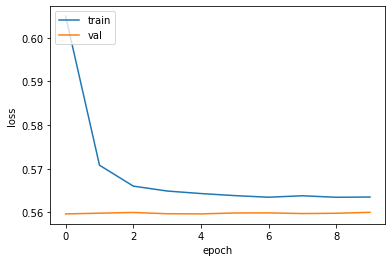

In [10]:
def setup_FCN_3():

    # Swquential Model is used.
    model = tf.keras.Sequential()

    # Consist of 4 Layers of nodes.
    # First layer consist of 2 nodes, to receive 2 inputs
    # Second layer consist of 12 nodes.
    # Third layer consist of  12 nodes.
    # Last Layer consist of 1 node, to output either 0 or 1
    # We are using binary_crossentropy as the loss function, hence the last layer is setup that way.

    model.add(tf.keras.layers.Dense(2, input_shape=(None, 2), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(32, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile the model using binary_crossentropy.
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    # return the model after compilation
    return model

# Create and setting up the model using setup_FCN()
model = setup_FCN_3()
model.save('models/small_Q3_FCN3.h5')

# Use model.fit to train it. As we have a very large dataset, we do not have to train it multiple times.
history = model.fit(pd_train_data, pd_train_data_target, validation_data=(pd_test_data, pd_test_data_target), epochs=10, batch_size=100)

plot_history(history)

Epoch 1/10
810/810 [==============================] - 2s 2ms/step - loss: 0.5910 - accuracy: 0.7339 - val_loss: 0.5608 - val_accuracy: 0.7524
Epoch 2/10
810/810 [==============================] - 1s 2ms/step - loss: 0.5699 - accuracy: 0.7497 - val_loss: 0.5600 - val_accuracy: 0.7524
Epoch 3/10
810/810 [==============================] - 1s 2ms/step - loss: 0.5661 - accuracy: 0.7498 - val_loss: 0.5598 - val_accuracy: 0.7524
Epoch 4/10
810/810 [==============================] - 1s 2ms/step - loss: 0.5647 - accuracy: 0.7498 - val_loss: 0.5596 - val_accuracy: 0.7524
Epoch 5/10
810/810 [==============================] - 1s 2ms/step - loss: 0.5636 - accuracy: 0.7498 - val_loss: 0.5597 - val_accuracy: 0.7524
Epoch 6/10
810/810 [==============================] - 1s 2ms/step - loss: 0.5635 - accuracy: 0.7498 - val_loss: 0.5596 - val_accuracy: 0.7524
Epoch 7/10
810/810 [==============================] - 1s 2ms/step - loss: 0.5632 - accuracy: 0.7498 - val_loss: 0.5596 - val_accuracy: 0.7524
Epoch 

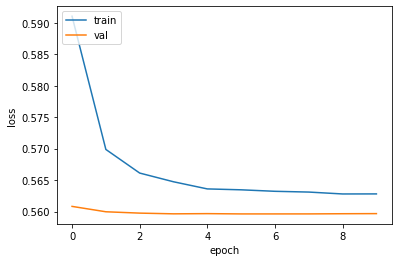

In [11]:
def setup_FCN_4():

    # Swquential Model is used.
    model = tf.keras.Sequential()

    # Consist of 4 Layers of nodes.
    # First layer consist of 2 nodes, to receive 2 inputs
    # Second layer consist of 12 nodes.
    # Third layer consist of  12 nodes.
    # Last Layer consist of 1 node, to output either 0 or 1
    # We are using binary_crossentropy as the loss function, hence the last layer is setup that way.

    model.add(tf.keras.layers.Dense(2, input_shape=(None, 2), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(16, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(16, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile the model using binary_crossentropy.
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    # return the model after compilation
    return model

# Create and setting up the model using setup_FCN()
model = setup_FCN_4()
model.save('models/small_Q3_FCN4.h5')

# Use model.fit to train it. As we have a very large dataset, we do not have to train it multiple times.
history = model.fit(pd_train_data, pd_train_data_target, validation_data=(pd_test_data, pd_test_data_target), epochs=10, batch_size=100)

plot_history(history)

In [12]:
predict = model.predict(np.array([[65000, 0]]))
print(predict)

[[0.25182462]]
